In [44]:
# prerequisites 
import csv
import os
import matplotlib.pyplot as plt
import numpy as np  
from sklearn import linear_model
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [55]:
# load data and consider a single feature (family) and the output to be estimated (happiness)

def loadData(fileName, inputVariabName, outputVariabName):
    data = []
    dataNames = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                dataNames = row
            else:
                data.append(row)
            line_count += 1
    selectedVariable = dataNames.index(inputVariabName)
    inputs = [float(data[i][selectedVariable]) for i in range(len(data))]
    selectedOutput = dataNames.index(outputVariabName)
    outputs = [float(data[i][selectedOutput]) for i in range(len(data))]
    
    return inputs, outputs

crtDir =  os.getcwd()
filePath = os.path.join(crtDir, 'data', 'v1_world-happiness-report-2017.csv')

inputs, outputs = loadData(filePath, 'Family', 'Happiness.Score')
print('in:  ', inputs[:5])
print('out: ', outputs[:5])

in:   [1.510041952, 1.510041952, 1.510041952, 1.510041952, 1.510041952]
out:  [7.537000179, 7.521999836, 7.504000187, 7.493999958, 7.468999863]


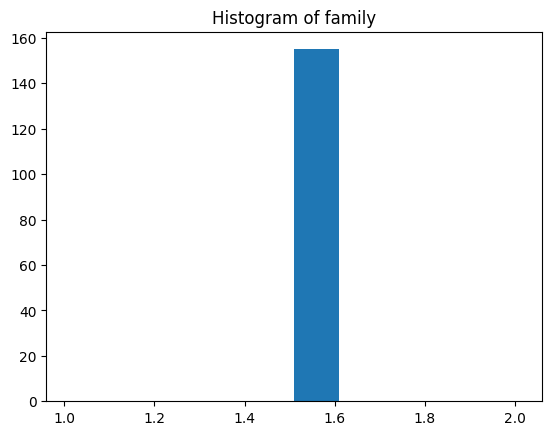

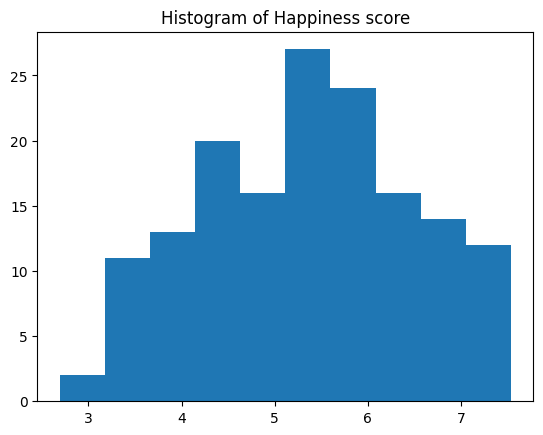

In [56]:
# see how the data looks (plot the histograms associated to input data - Family feature - and output data - happiness)

def plotDataHistogram(x, variableName):
    n, bins, patches = plt.hist(x, 10)
    plt.title('Histogram of ' + variableName)
    plt.show()

plotDataHistogram(inputs, 'family')
plotDataHistogram(outputs, 'Happiness score')

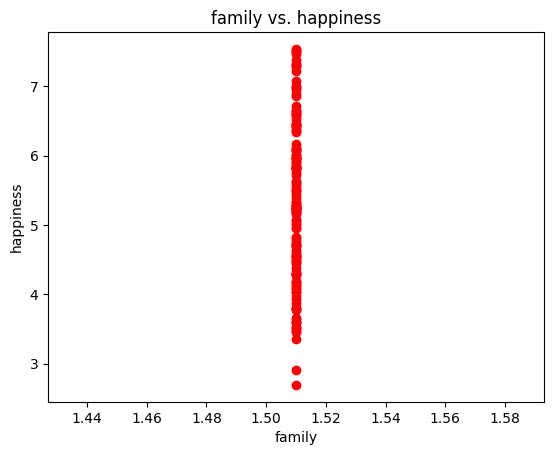

In [57]:
# check the liniarity (to check that a linear relationship exists between the dependent variable (y = happiness) and the independent variable (x = capita).)

plt.plot(inputs, outputs, 'ro') 
plt.xlabel('family')
plt.ylabel('happiness')
plt.title('family vs. happiness')
plt.show()

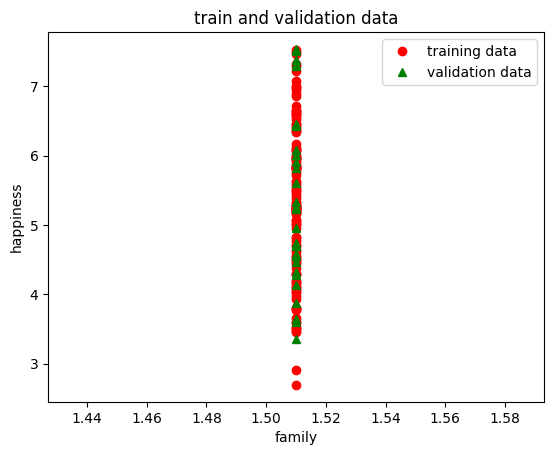

In [58]:
# Split the Data Into Training and Test Subsets
# In this step we will split our dataset into training and testing subsets (in proportion 80/20%).

# Training data set is used for learning the linear model. Testing dataset is used for validating of the model. All data from testing dataset will be new to model and we may check how accurate are model predictions.

np.random.seed(5)
indexes = [i for i in range(len(inputs))]
trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace = False)
validationSample = [i for i in indexes  if not i in trainSample]

trainInputs = [inputs[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]

validationInputs = [inputs[i] for i in validationSample]
validationOutputs = [outputs[i] for i in validationSample]

plt.plot(trainInputs, trainOutputs, 'ro', label = 'training data')   #train data are plotted by red and circle sign
plt.plot(validationInputs, validationOutputs, 'g^', label = 'validation data')     #test data are plotted by green and a triangle sign
plt.title('train and validation data')
plt.xlabel('family')
plt.ylabel('happiness')
plt.legend()
plt.show()

In [59]:
# learning step: init and train a linear regression model y = f(x) = w0 + w1 * x
# Prediction step: used the trained model to estimate the output for a new input

# using sklearn 
# training data preparation (the sklearn linear model requires as input training data as noSamples x noFeatures array; in the current case, the input must be a matrix of len(trainInputs) lineas and one columns (a single feature is used in this problem))
xx = [[el] for el in trainInputs]

# model initialisation
regressor = linear_model.LinearRegression()
# training the model by using the training inputs and known training outputs
regressor.fit(xx, trainOutputs)
# save the model parameters
w0, w1 = regressor.intercept_, regressor.coef_[0]
print('the learnt model: f(x) = ', w0, ' + ', w1, ' * x')


the learnt model: f(x) =  0.4719180650554877  +  3.2328954364819484  * x


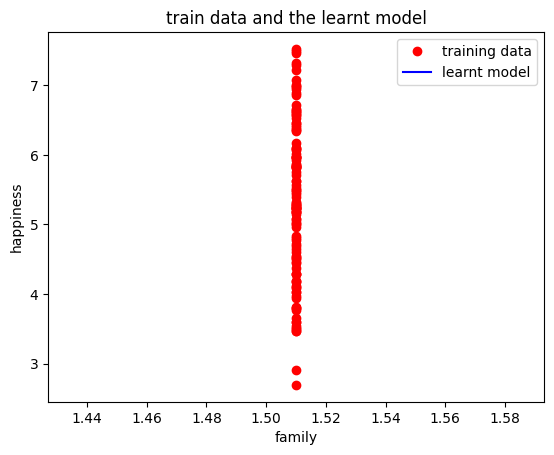

In [60]:
# plot the learnt model
# prepare some synthetic data (inputs are random, while the outputs are computed by the learnt model)
noOfPoints = 1000
xref = []
val = min(trainInputs)
step = (max(trainInputs) - min(trainInputs)) / noOfPoints
for i in range(1, noOfPoints):
    xref.append(val)
    val += step
yref = [w0 + w1 * el for el in xref] 

plt.plot(trainInputs, trainOutputs, 'ro', label = 'training data')  #train data are plotted by red and circle sign
plt.plot(xref, yref, 'b-', label = 'learnt model')                  #model is plotted by a blue line
plt.title('train data and the learnt model')
plt.xlabel('family')
plt.ylabel('happiness')
plt.legend()
plt.show()

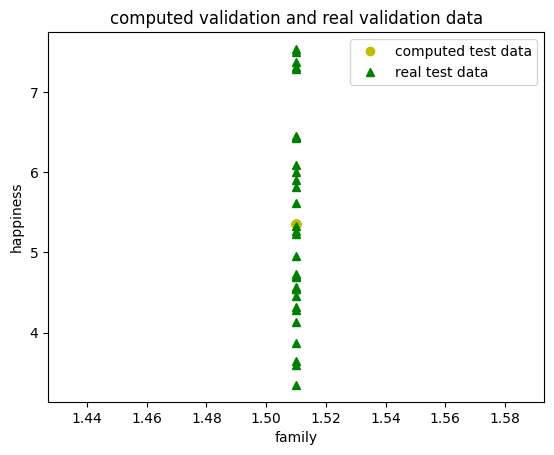

In [61]:
# use the trained model to predict new inputs

# makes predictions for test data (manual)
# computedTestOutputs = [w0 + w1 * el for el in testInputs]

# makes predictions for test data (by tool)
computedValidationOutputs = regressor.predict([[x] for x in validationInputs])

# plot the computed outputs (see how far they are from the real outputs)
plt.plot(validationInputs, computedValidationOutputs, 'yo', label = 'computed test data')  #computed test data are plotted yellow red and circle sign
plt.plot(validationInputs, validationOutputs, 'g^', label = 'real test data')  #real test data are plotted by green triangles
plt.title('computed validation and real validation data')
plt.xlabel('family')
plt.ylabel('happiness')
plt.legend()
plt.show()

In [54]:
# compute the differences between the predictions and real outputs
# "manual" computation
error = 0.0
for t1, t2 in zip(computedValidationOutputs, validationOutputs):
    error += (t1 - t2) ** 2
error = error / len(validationOutputs)
print('prediction error (manual): ', error)

# by using sklearn 
from sklearn.metrics import mean_squared_error

error = mean_squared_error(validationOutputs, computedValidationOutputs)
print('prediction error (tool):  ', error)

prediction error (manual):  0.6051231125473607
prediction error (tool):   0.6051231125473606


In [76]:
# load data and consider a two features (GDP, freedom) and the output to be estimated (happiness)

def loadData(fileName, inputVariabNames, outputVariabName):
    data = []
    dataNames = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                dataNames = row
            else:
                data.append(row)
            line_count += 1
    
    # Filter out rows with missing or non-numeric values
    filtered_data = [row for row in data if all(row[dataNames.index(var)] != '' and row[dataNames.index(var)].replace('.', '').isdigit() for var in inputVariabNames + [outputVariabName])]
    
    selectedVariables = [dataNames.index(var) for var in inputVariabNames]
    inputs = [[float(row[j]) for j in selectedVariables] for row in filtered_data]
    
    selectedOutput = dataNames.index(outputVariabName)
    outputs = [float(row[selectedOutput]) for row in filtered_data]
    
    return inputs, outputs

crtDir =  os.getcwd()
filePath = os.path.join(crtDir, 'data', 'v3_world-happiness-report-2017.csv')

inputs, outputs = loadData(filePath, ['Economy..GDP.per.Capita.', 'Freedom'], 'Happiness.Score')
print('in:  ', inputs[:5])
print('out: ', outputs[:5])

in:   [[1.616463184, 0.635422587], [1.482383013, 0.626006722], [1.48063302, 0.627162635], [1.564979553, 0.620070577], [1.443571925, 0.617950857]]
out:  [7.537000179, 7.521999836, 7.504000187, 7.493999958, 7.468999863]


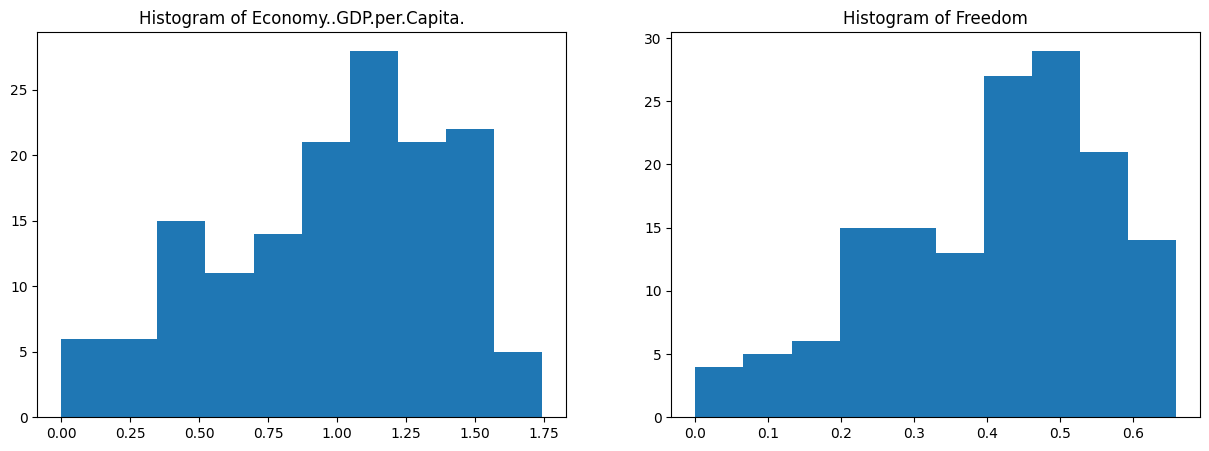

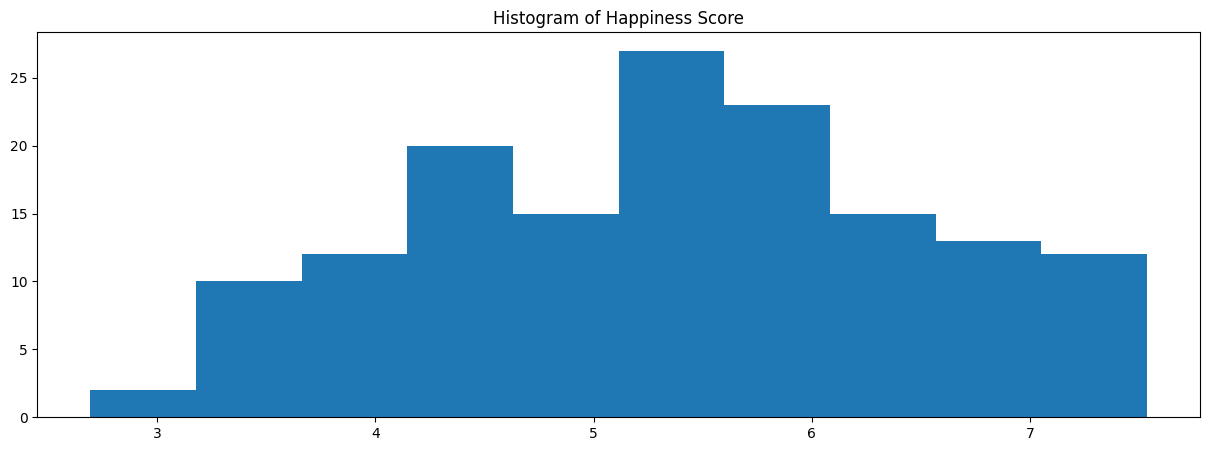

In [77]:
def plotDataHistogram(x, variableNames):
    fig, axs = plt.subplots(1, len(variableNames), figsize=(15, 5))
    if len(variableNames) == 1:
        axs.hist(x, bins=10)
        axs.set_title('Histogram of ' + variableNames[0])
    else:
        for i, var in enumerate(variableNames):
            axs[i].hist([row[i] for row in x], bins=10)
            axs[i].set_title('Histogram of ' + var)
    plt.show()

inputs, outputs = loadData(filePath, ['Economy..GDP.per.Capita.', 'Freedom'], 'Happiness.Score')

plotDataHistogram(inputs, ['Economy..GDP.per.Capita.', 'Freedom'])
plotDataHistogram(outputs, ['Happiness Score'])

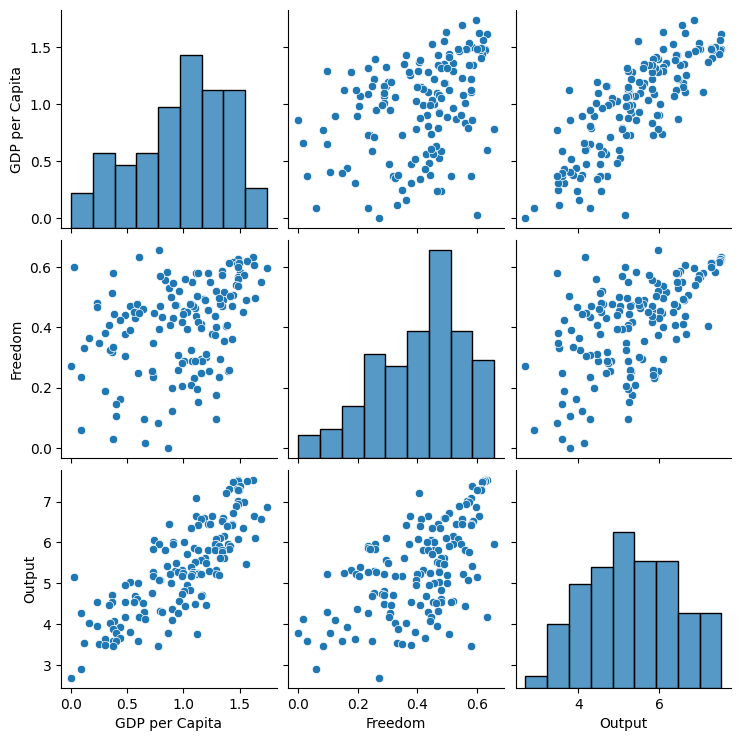

In [78]:
def plotScatterMatrix(inputs, output, variableNames):
    data = pd.DataFrame(inputs, columns=variableNames)
    data['Output'] = output
    sns.pairplot(data)
    plt.show()

inputs, outputs = loadData(filePath, ['Economy..GDP.per.Capita.', 'Freedom'], 'Happiness.Score')

plotScatterMatrix(inputs, outputs, ['GDP per Capita', 'Freedom'])

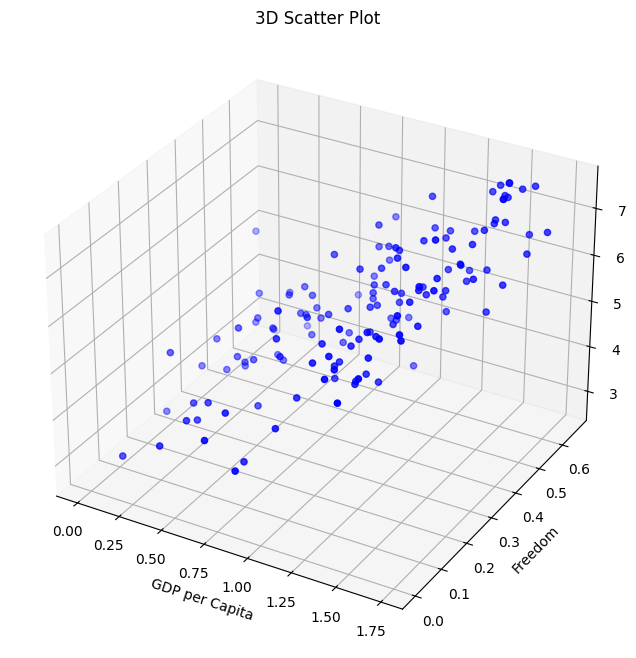

In [79]:
def plot3DScatter(inputs, output, variableNames):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(inputs[:, 0], inputs[:, 1], output, c='b', marker='o')

    ax.set_xlabel(variableNames[0])
    ax.set_ylabel(variableNames[1])
    ax.set_zlabel('Happiness Score')
    ax.set_title('3D Scatter Plot')

    plt.show()


inputs, outputs = loadData(filePath, ['Economy..GDP.per.Capita.', 'Freedom'], 'Happiness.Score')

plot3DScatter(np.array(inputs), np.array(outputs), ['GDP per Capita', 'Freedom'])

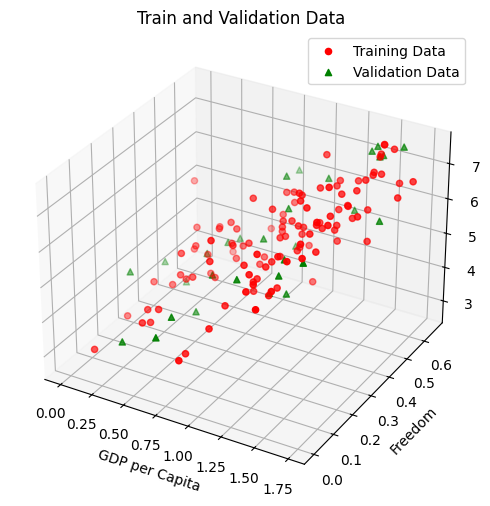

In [80]:
# Splitting the data into training and validation sets
np.random.seed(5)
indexes = [i for i in range(len(inputs))]
trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace=False)
validationSample = [i for i in indexes if not i in trainSample]

trainInputs = np.array([inputs[i] for i in trainSample])
trainOutputs = np.array([outputs[i] for i in trainSample])

validationInputs = np.array([inputs[i] for i in validationSample])
validationOutputs = np.array([outputs[i] for i in validationSample])

# Plotting the training and validation data
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(trainInputs[:, 0], trainInputs[:, 1], trainOutputs, c='r', marker='o', label='Training Data') # Plotting GDP per Capita and Freedom
ax.scatter(validationInputs[:, 0], validationInputs[:, 1], validationOutputs, c='g', marker='^', label='Validation Data') # Plotting GDP per Capita and Freedom
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Freedom')
ax.set_zlabel('Happiness Score')
plt.title('Train and Validation Data')
plt.legend()
plt.show()

In [81]:
# Model initialization
regressor = LinearRegression()

# Training the model using the training inputs and known training outputs
regressor.fit(trainInputs, trainOutputs)

# Save the model parameters
intercept = regressor.intercept_
coefficients = regressor.coef_

print('The learned model:')
print('Intercept (w0):', intercept)
print('Coefficients (w1, w2):', coefficients)

The learned model:
Intercept (w0): 2.546696109833419
Coefficients (w1, w2): [1.92085903 2.24055151]


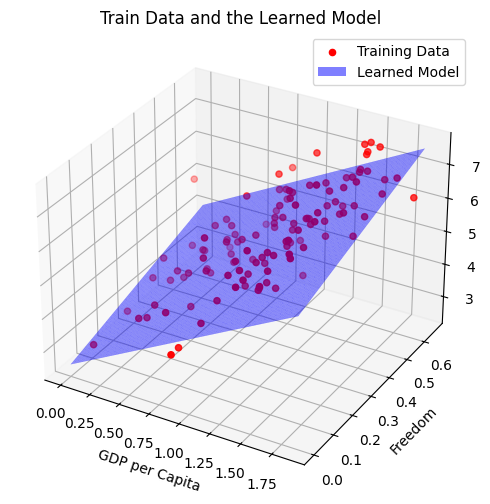

In [75]:
# Generate synthetic data with both features
x1_min, x1_max = np.min(trainInputs[:, 0]), np.max(trainInputs[:, 0])  # Min and max of GDP per Capita
x2_min, x2_max = np.min(trainInputs[:, 1]), np.max(trainInputs[:, 1])  # Min and max of Freedom
x1_ref = np.linspace(x1_min, x1_max, 100)
x2_ref = np.linspace(x2_min, x2_max, 100)
x1_ref, x2_ref = np.meshgrid(x1_ref, x2_ref)
xref = np.column_stack((x1_ref.ravel(), x2_ref.ravel()))  # Combine into a single array

# Predict using the learned model
yref = regressor.predict(xref)

# Plot the training data and the learned model
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(trainInputs[:, 0], trainInputs[:, 1], trainOutputs, c='r', marker='o', label='Training Data') # Plotting training data
ax.plot_trisurf(x1_ref.ravel(), x2_ref.ravel(), yref, linewidth=0.2, antialiased=True, color='b', alpha=0.5, label='Learned Model') # Plotting the learned model
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Freedom')
ax.set_zlabel('Happiness Score')
plt.title('Train Data and the Learned Model')
plt.legend()
plt.show()

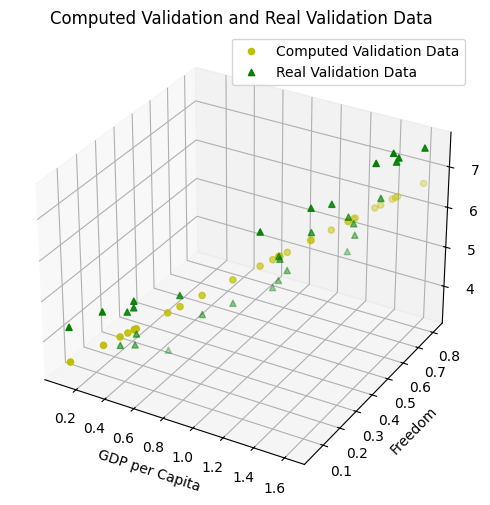

In [23]:
# Makes predictions for validation data using the trained model
computedValidationOutputs = regressor.predict(validationInputs)

# Plot the computed outputs against the real outputs
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(validationInputs[:, 0], validationInputs[:, 1], computedValidationOutputs, c='y', marker='o', label='Computed Validation Data')  # Computed validation data
ax.scatter(validationInputs[:, 0], validationInputs[:, 1], validationOutputs, c='g', marker='^', label='Real Validation Data')  # Real validation data
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Freedom')
ax.set_zlabel('Happiness Score')
plt.title('Computed Validation and Real Validation Data')
plt.legend()
plt.show()

In [174]:
# "Manual" computation
error_manual = np.mean((computedValidationOutputs - validationOutputs) ** 2)
print('Prediction error (manual): ', error_manual)

# Using sklearn
from sklearn.metrics import mean_squared_error

error_tool = mean_squared_error(validationOutputs, computedValidationOutputs)
print('Prediction error (tool):  ', error_tool)

Prediction error (manual):  0.4142102429519938
Prediction error (tool):   0.4142102429519938
